In [ ]:
import requests import time REFRESH_TOKEN = "xxxx" CLIENT_ID = "xxxx" CLIENT_SECRET = "xxxx" headers_auth = { "Content-Type": "application/x-www-form-urlencoded;charset=UTF-8", } data = { "grant_type": "refresh_token", "client_id": CLIENT_ID, "refresh_token": REFRESH_TOKEN, "client_secret": CLIENT_SECRET, } response = requests.post( "https://api.amazon.com/auth/o2/token", headers=headers_auth, data=data ).json() headers = { "Amazon-Advertising-API-ClientId": CLIENT_ID, "Authorization": response["access_token"], "Amazon-Advertising-API-Scope": "2024108122916885", "Accept": "application/vnd.spCampaign.v3+json", "Content-Type": "application/vnd.spCampaign.v3+json", } AMAZON_URL = "https://advertising-api.amazon.com/sp/campaigns/list" all_campaigns = [] next_token = None while True: payload = { "stateFilter": {"include": ["ENABLED", "PAUSED", "ARCHIVED"]}, "includeExtendedDataFields": False, "maxResults": 100 # Request maximum per page to reduce loop iterations } if next_token: payload["nextToken"] = next_token response = requests.post(AMAZON_URL, headers=headers, json=payload) if response.status_code != 200: print(f"Error: {response.status_code} - {response.text}") break data = response.json() batch = data.get("campaigns", []) all_campaigns.extend(batch) print(f"Fetched {len(batch)} campaigns... Total collected: {len(all_campaigns)}") next_token = data.get("nextToken") if not next_token: break # Optional: Short sleep to respect rate limits if you have many pages time.sleep(0.5) print("\n Results -") #print(f"{data} \n") #len(data["campaigns"]) print(all_campaigns) #print(len(all_campaigns)) print(f"Total campaigns fetched: {len(all_campaigns)}")

**GPT**

In [ ]:
import requests
import time

# =======================
# AUTH CREDENTIALS
# =======================
REFRESH_TOKEN = "xxxx"
CLIENT_ID = "xxxx"
CLIENT_SECRET = "xxxx"

# =======================
# STEP 1: GET ACCESS TOKEN
# =======================
headers_auth = {
    "Content-Type": "application/x-www-form-urlencoded;charset=UTF-8",
}

data = {
    "grant_type": "refresh_token",
    "client_id": CLIENT_ID,
    "refresh_token": REFRESH_TOKEN,
    "client_secret": CLIENT_SECRET,
}

response = requests.post(
    "https://api.amazon.com/auth/o2/token",
    headers=headers_auth,
    data=data
).json()

# =======================
# STEP 2: API HEADERS
# =======================
headers = {
    "Amazon-Advertising-API-ClientId": CLIENT_ID,
    "Authorization": response["access_token"],
    "Amazon-Advertising-API-Scope": "2024108122916885",
    "Accept": "application/vnd.spCampaign.v3+json",
    "Content-Type": "application/vnd.spCampaign.v3+json",
}

AMAZON_URL = "https://advertising-api.amazon.com/sp/campaigns/list"

# =======================
# STEP 3: FETCH ALL CAMPAIGNS
# =======================
all_campaigns = []
next_token = None

while True:

    payload = {
        "stateFilter": {"include": ["ENABLED", "PAUSED", "ARCHIVED"]},
        "includeExtendedDataFields": False,
        "maxResults": 100
    }

    if next_token:
        payload["nextToken"] = next_token

    response = requests.post(AMAZON_URL, headers=headers, json=payload)

    if response.status_code != 200:
        print(f"Error: {response.status_code} - {response.text}")
        break

    data = response.json()

    batch = data.get("campaigns", [])
    all_campaigns.extend(batch)

    print(f"Fetched {len(batch)} campaigns... Total collected: {len(all_campaigns)}")

    next_token = data.get("nextToken")

    if not next_token:
        break

    time.sleep(0.5)

# =======================
# STEP 4: EXTRACT ONLY CAMPAIGN IDS
# =======================
campaign_ids = []

for campaign in all_campaigns:
    if "campaignId" in campaign:
        campaign_ids.append(campaign["campaignId"])

# =======================
# FINAL OUTPUT
# =======================
print("\nCampaign IDs:")
print(campaign_ids)
print(f"Total campaign IDs collected: {len(campaign_ids)}")


🧠 EXPLANATION (Very Simple)
🔹 Step 1 – Authentication

Amazon needs an access token

You send refresh_token + client_id + client_secret

Amazon returns a temporary access token

👉 Like showing an ID card before entering a building.

🔹 Step 2 – Headers

You tell Amazon:

Who you are (ClientId)

Your permission (Authorization)

Which account you want (Scope)

What type of data you want (campaigns)

🔹 Step 3 – Pagination Loop

Amazon sends 100 campaigns per request.

So:

First request → 100 campaigns

Amazon gives nextToken

Next request → next 100 campaigns

Repeat until nextToken = None

👉 Like flipping pages in a book 📖

🔹 Step 4 – Extract campaignId

Each campaign looks like this:

{
  "campaignId": "69766793884560",
  "name": "Vyncs Campaign",
  "budget": {...},
  ...
}


We ignore everything except:

campaign["campaignId"]

🔁 DRY RUN (Small Example)
Suppose all_campaigns is:
all_campaigns = [
    {"campaignId": "111", "name": "A"},
    {"campaignId": "222", "name": "B"},
    {"campaignId": "333", "name": "C"}
]

Loop execution:
Iteration	campaign	Extracted
1	{"campaignId": "111"}	"111"
2	{"campaignId": "222"}	"222"
3	{"campaignId": "333"}	"333"
Final result:
campaign_ids = ["111", "222", "333"]

**Gemini**

In [ ]:
import requests
import time

# Credentials (keep as "xxxx" for security)
REFRESH_TOKEN = "xxxx"
CLIENT_ID = "xxxx"
CLIENT_SECRET = "xxxx"

# --- Authentication and Header setup ---
headers_auth = {
    "Content-Type": "application/x-www-form-urlencoded;charset=UTF-8",
}

data = {
    "grant_type": "refresh_token",
    "client_id": CLIENT_ID,
    "refresh_token": REFRESH_TOKEN,
    "client_secret": CLIENT_SECRET,
}

response = requests.post(
    "https://api.amazon.com/auth/o2/token", headers=headers_auth, data=data
).json()

headers = {
    "Amazon-Advertising-API-ClientId": CLIENT_ID,
    "Authorization": response["access_token"],
    "Amazon-Advertising-API-Scope": "2024108122916885",
    "Accept": "application/vnd.spCampaign.v3+json",
    "Content-Type": "application/vnd.spCampaign.v3+json",
}

AMAZON_URL = "https://advertising-api.amazon.com/sp/campaigns/list"

# --- Fetching Campaigns ---
all_campaigns = []
next_token = None

while True:
    payload = {
        "stateFilter": {"include": ["ENABLED", "PAUSED", "ARCHIVED"]},
        "includeExtendedDataFields": False,
        "maxResults": 100 
    }

    if next_token:
        payload["nextToken"] = next_token

    response = requests.post(AMAZON_URL, headers=headers, json=payload)

    if response.status_code != 200:
        print(f"Error: {response.status_code} - {response.text}")
        break

    data = response.json()
    batch = data.get("campaigns", [])
    all_campaigns.extend(batch)

    print(f"Fetched {len(batch)} campaigns... Total collected: {len(all_campaigns)}")

    next_token = data.get("nextToken")
    if not next_token:
        break

    time.sleep(0.5)

# --- NEW TASK: Store only Campaign IDs in a list ---
# Use a list comprehension to extract 'campaignId' from each campaign object
campaign_id_list = [campaign['campaignId'] for campaign in all_campaigns]

print("\nResults -")
print(f"List of Campaign IDs: {campaign_id_list}")
print(f"Total campaign IDs stored: {len(campaign_id_list)}")

To help you understand how the code processes your data, here is a detailed breakdown and a dry run based on the content of your temp.txt file.

1. Understanding the Key Components
batch variable: Think of this as a "page" of results. If you have 1000 campaigns, Amazon doesn't send them all at once (which would be a massive, slow file). Instead, it sends them in groups (e.g., 100 at a time). batch holds the current group of 100 campaigns currently being processed in the loop.

.get() method: In Python, data.get("campaigns", []) is a safer way to access a dictionary.

If the key "campaigns" exists, it returns the list of campaigns.

If the key is missing (e.g., if there's an API error or no campaigns), it returns the default value [] (an empty list) instead of crashing your program with a KeyError.

extend() vs append():

append() would put the entire list into the list (creating a list inside a list).

extend() takes each individual item from the batch and adds them one by one into all_campaigns.

2. Dry Run (Step-by-Step Visualization)
Let's trace what happens inside the code using a simplified version of your temp.txt data.

The Setup: Suppose the API returns a response containing two campaigns. response.json() looks like this:

Python

{
    "campaigns": [
        {"campaignId": "69766793884560", "name": "Vyncs..."},
        {"campaignId": "52699715720253", "name": "VyncsLink..."}
    ],
    "nextToken": None
}
Step 1: Fetching the Batch

Python

batch = data.get("campaigns", []) 
# Result: batch now contains the list of 2 dictionaries.
Step 2: Accumulating

Python

all_campaigns.extend(batch)
# Result: all_campaigns = [{'campaignId': '697667...'}, {'campaignId': '526997...'}]
Step 3: The Extraction (The New Code) This is where we pull out just the IDs:

Python

campaign_id_list = [campaign['campaignId'] for campaign in all_campaigns]
How the List Comprehension works internally:

Iteration 1: It looks at the first dictionary. It finds the value for 'campaignId': "69766793884560". It adds this to the new list.

Iteration 2: It looks at the second dictionary. It finds the value: "52699715720253". It adds this to the new list.

Final Result: campaign_id_list = ["69766793884560", "52699715720253"]

3. Why modify the final part?
In your original code, all_campaigns stores the entire object (budget, state, name, dates, etc.). By using the extraction line at the end, you discard all the "noise" (like the budget and dates) and keep only the specific ID you need for future API calls (like updating bids or fetching ad groups).

Comparison:

Original all_campaigns: A list of heavy dictionaries.

New campaign_id_list: A lightweight list of strings/numbers.

In [ ]:
import requests
import time

# --- Setup stays the same ---
REFRESH_TOKEN = "xxxx"
CLIENT_ID = "xxxx"
CLIENT_SECRET = "xxxx"

# ... (Auth code to get access_token) ...

headers = {
    "Amazon-Advertising-API-ClientId": CLIENT_ID,
    "Authorization": response["access_token"],
    "Amazon-Advertising-API-Scope": "2024108122916885",
    "Accept": "application/vnd.spCampaign.v3+json",
    "Content-Type": "application/vnd.spCampaign.v3+json",
}

AMAZON_URL = "https://advertising-api.amazon.com/sp/campaigns/list"

# --- SIMPLIFIED FETCHING ---
campaign_id_list = []
next_token = None

while True:
    payload = {"stateFilter": {"include": ["ENABLED", "PAUSED", "ARCHIVED"]}}
    
    if next_token:
        payload["nextToken"] = next_token

    # Direct extraction without a separate 'batch' variable
    response_data = requests.post(AMAZON_URL, headers=headers, json=payload).json()
    
    # Accessing the key directly (Assumes the API always succeeds and returns the key)
    for campaign in response_data["campaigns"]:
        campaign_id_list.append(campaign["campaignId"])

    next_token = response_data.get("nextToken") # Still needed for pagination
    if not next_token:
        break

print(f"Total IDs collected: {len(campaign_id_list)}")
print(campaign_id_list)

Yes, you can simplify the code to remove those specific elements. However, it is important to understand why they were there in the first place so you can decide if removing them is right for your project.

Simplified Code (Without batch, .get(), or maxResults)
This version is much shorter and achieves the same goal of creating a list of only Campaign IDs.


Why we could remove them (and what you lose)
1. Removing the batch variable

What was it? It was a temporary container for one "page" of data.





Can it be removed? Yes. You can loop through response_data["campaigns"] directly and add the IDs to your final list immediately.





Dry Run Change: Instead of adding a list of dictionaries to another list of dictionaries, you are now plucking out the ID and adding it directly to your string list.


2. Removing the .get() method
What was it? A safety feature that prevented the code from crashing if "campaigns" was missing from the response.


Can it be removed? Yes, by using response_data["campaigns"].

The Risk: If the Amazon API returns an error message instead of a campaign list, your code will crash with a KeyError. Using .get() is "defensive programming."

3. Removing the maxResults parameter

What was it? A way to tell Amazon "send me 100 items per page".



Can it be removed? Yes. If you don't provide it, the API will use its own default value (which is usually much smaller, like 10 or 50).



The Result: Your code will still work, but it will have to "talk" to the Amazon server many more times to get all your data, making the script run slower.



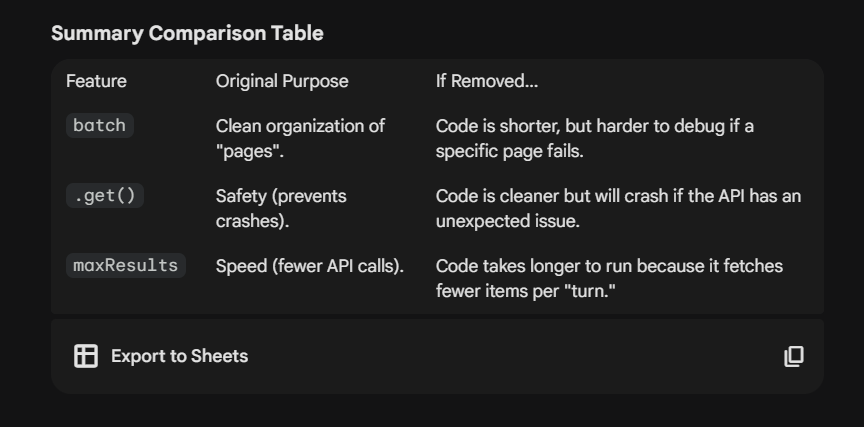